In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# reading csv 
movies = pd.read_csv('/Users/hannwenyein/Downloads/archive-3/movies_metadata.csv', dtype={10: 'str'})

# view first 5 rows
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
#Create a new dataset with only the specified columns
columns = ['genres', 'id', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count' ]

movies = movies[columns]

In [5]:
movies.dropna(inplace=True)

In [6]:
#checking null values
movies.isnull().sum()

genres          0
id              0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        45376 non-null  object 
 1   id            45376 non-null  object 
 2   popularity    45376 non-null  object 
 3   release_date  45376 non-null  object 
 4   title         45376 non-null  object 
 5   vote_average  45376 non-null  float64
 6   vote_count    45376 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.8+ MB


In [8]:
movies.rename(columns={'id': 'movieId'}, inplace=True)

In [9]:
# reading csv 
ratings = pd.read_csv('/Users/hannwenyein/Downloads/archive-3/ratings.csv', dtype={10: 'str'})

# view first 5 rows
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [11]:
#checking null values
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
movies['movieId'] = movies['movieId'].astype('int64')

In [13]:
merged_df = pd.merge(ratings, movies, left_on='movieId', right_on='movieId', how='left')



In [14]:
merged_df.head(3)

,userId,movieId,rating,timestamp,genres,popularity,release_date,title,vote_average,vote_count
0,1,110,1.0,1425941529,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",7.832755,1994-05-27,Three Colors: Red,7.8,246.0
1,1,147,4.5,1425942435,"[{'id': 18, 'name': 'Drama'}]",7.268688,1959-05-04,The 400 Blows,8.0,363.0
2,1,858,5.0,1425941523,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",10.234919,1993-06-24,Sleepless in Seattle,6.5,630.0


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26025358 entries, 0 to 26025357
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   movieId       int64  
 2   rating        float64
 3   timestamp     int64  
 4   genres        object 
 5   popularity    object 
 6   release_date  object 
 7   title         object 
 8   vote_average  float64
 9   vote_count    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 2.1+ GB


In [16]:
merged_df.dropna(inplace=True)

In [17]:
#checking null values
merged_df.isnull().sum()

userId          0
movieId         0
rating          0
timestamp       0
genres          0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430604 entries, 0 to 26025353
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   userId        int64  
 1   movieId       int64  
 2   rating        float64
 3   timestamp     int64  
 4   genres        object 
 5   popularity    object 
 6   release_date  object 
 7   title         object 
 8   vote_average  float64
 9   vote_count    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 959.3+ MB


In [19]:
merged_df.duplicated().sum()

141

In [20]:
# Removing duplicates, keeping the first occurrence
merged_df.drop_duplicates(inplace=True)

In [21]:
merged_df.duplicated().sum()

0

In [22]:
merged_df.shape

(11430463, 10)

# EDA

In [23]:
# Descriptive Statistics
print("\nSummary Statistics:")
print(merged_df.describe())


Summary Statistics:
             userId       movieId        rating     timestamp  vote_average  \
count  1.143046e+07  1.143046e+07  1.143046e+07  1.143046e+07  1.143046e+07   
mean   1.351159e+05  7.068906e+03  3.532527e+00  1.122069e+09  6.621900e+00   
std    7.812306e+04  1.825348e+04  1.067017e+00  2.048524e+08  1.059339e+00   
min    1.000000e+00  2.000000e+00  5.000000e-01  7.896520e+08  0.000000e+00   
25%    6.739700e+04  5.000000e+02  3.000000e+00  9.511770e+08  6.100000e+00   
50%    1.354150e+05  1.408000e+03  4.000000e+00  1.107284e+09  6.800000e+00   
75%    2.026930e+05  3.033000e+03  4.000000e+00  1.280651e+09  7.300000e+00   
max    2.708960e+05  1.762730e+05  5.000000e+00  1.501829e+09  1.000000e+01   

         vote_count  
count  1.143046e+07  
mean   6.599616e+02  
std    1.212223e+03  
min    0.000000e+00  
25%    2.900000e+01  
50%    1.600000e+02  
75%    6.580000e+02  
max    1.407500e+04  


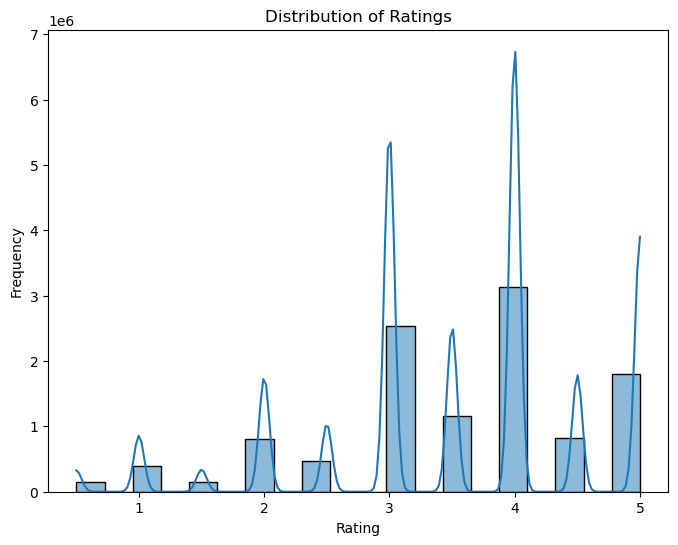

In [24]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

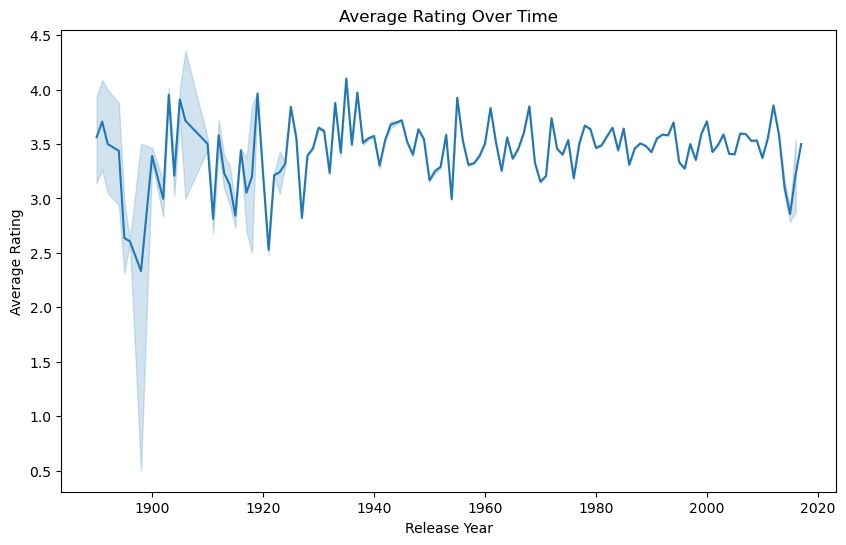

In [25]:
# Distribution of Ratings Over Time (Year)
merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='rating', data=merged_df)
plt.title('Average Rating Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()



In [26]:
# Convert release_date to datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# Extract year from release_date
merged_df['release_year'] = merged_df['release_date'].dt.year

# Get value counts for a categorical column
print(merged_df['release_year'].value_counts())

# Get unique values for a categorical column
print(merged_df['release_year'].unique())

2006    650800
2007    642616
2003    562081
2004    544839
2000    499948
         ...  
1918        10
1894         8
1906         7
1898         3
2017         1
Name: release_year, Length: 121, dtype: int64
[1994 1959 1993 2006 1997 1937 2007 2000 1979 2012 1995 2005 2002 2001
 1935 1991 1984 2003 1946 1975 1928 1989 1992 1949 1990 1940 1996 1999
 2004 1969 1956 1965 1933 1955 1961 1957 1977 1968 2008 1945 1974 1964
 2010 1922 1931 1924 1962 1950 1998 1983 1920 1936 1966 1958 1976 1967
 1982 1988 1972 1932 1987 2009 1986 1900 2011 1978 1896 1942 1953 1919
 1938 1971 1981 1960 1954 1944 1985 1939 1973 1948 1916 1926 1925 1980
 1963 1930 1952 1929 1947 1970 1941 1927 2013 1943 1951 1923 1903 1910
 1921 1914 1915 1934 2015 1911 1902 1913 2014 1912 2017 1904 1892 1895
 1905 2016 1891 1917 1906 1890 1918 1898 1894]


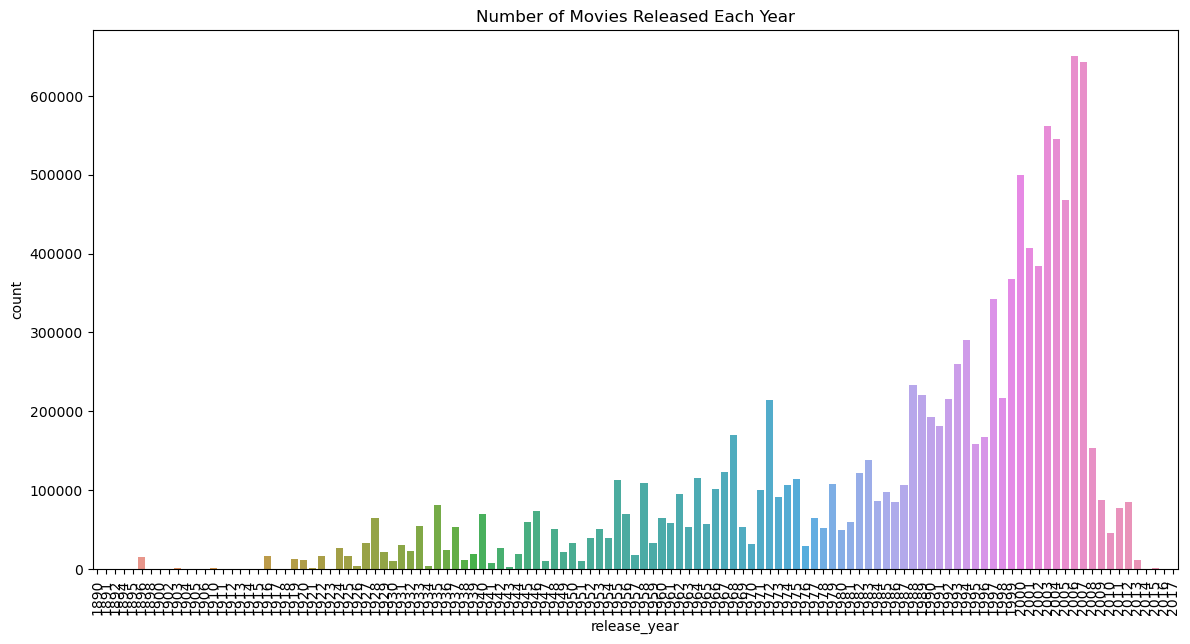

In [27]:
# Convert release_date to datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# Extract year from release_date
merged_df['release_year'] = merged_df['release_date'].dt.year

# Plot the number of movies released each year
plt.figure(figsize=(14, 7))
sns.countplot(data=merged_df, x='release_year')
plt.xticks(rotation=90)
plt.title('Number of Movies Released Each Year')
plt.show()

In [28]:
1.	Model Evaluation with Baseline and Matrix Factorization: 
o	Explain the concept of RMSE as an evaluation metric.
o	Briefly describe baseline and matrix factorization models (SVD, NMF).
o	Report the RMSE scores you obtained for the baseline, SVD, and NMF models.
o	Discuss which model performed best based on RMSE (consider including a table with the results).


SyntaxError: invalid syntax (1121857405.py, line 1)

# Genres Encoding

In [29]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Function to extract genre names
def extract_genre_names(genre_list):
    genres = []
    try:
        genres = [genre['name'] for genre in ast.literal_eval(genre_list)]
    except:
        pass
    return genres

# Extract genre names
merged_df['genres'] = merged_df['genres'].apply(extract_genre_names)

# One-hot encode the genre names
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(merged_df['genres'])

# Convert encoded genres to DataFrame
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Concatenate encoded genres with the original DataFrame
merged_df = pd.concat([merged_df, genres_df], axis=1)

# Drop the original 'genres' column
merged_df.drop('genres', axis=1, inplace=True)

# Print the resulting DataFrame to verify
print(merged_df.head())

   userId  movieId  rating     timestamp popularity release_date  \
0     1.0    110.0     1.0  1.425942e+09   7.832755   1994-05-27   
1     1.0    147.0     4.5  1.425942e+09   7.268688   1959-05-04   
2     1.0    858.0     5.0  1.425942e+09  10.234919   1993-06-24   
4     1.0   1246.0     5.0  1.425942e+09  11.697604   2006-12-20   
5     1.0   1968.0     4.0  1.425942e+09   6.285574   1997-02-14   

                  title  vote_average  vote_count  release_year  ...  History  \
0     Three Colors: Red           7.8       246.0        1994.0  ...      0.0   
1         The 400 Blows           8.0       363.0        1959.0  ...      0.0   
2  Sleepless in Seattle           6.5       630.0        1993.0  ...      0.0   
4          Rocky Balboa           6.5       858.0        2006.0  ...      0.0   
5         Fools Rush In           5.8       133.0        1997.0  ...      0.0   

   Horror  Music  Mystery  Romance  Science Fiction  TV Movie  Thriller  War  \
0     0.0    0.0      1.

In [30]:
merged_df.head()

,userId,movieId,rating,timestamp,popularity,release_date,title,vote_average,vote_count,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,110.0,1.0,1.425942e+09,7.832755,1994-05-27,Three Colors: Red,7.8,246.0,1994.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,147.0,4.5,1.425942e+09,7.268688,1959-05-04,The 400 Blows,8.0,363.0,1959.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,858.0,5.0,1.425942e+09,10.234919,1993-06-24,Sleepless in Seattle,6.5,630.0,1993.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1246.0,5.0,1.425942e+09,11.697604,2006-12-20,Rocky Balboa,6.5,858.0,2006.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1968.0,4.0,1.425942e+09,6.285574,1997-02-14,Fools Rush In,5.8,133.0,1997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
merged_df.head()

,userId,movieId,rating,timestamp,popularity,release_date,title,vote_average,vote_count,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,110.0,1.0,1.425942e+09,7.832755,1994-05-27,Three Colors: Red,7.8,246.0,1994.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,147.0,4.5,1.425942e+09,7.268688,1959-05-04,The 400 Blows,8.0,363.0,1959.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,858.0,5.0,1.425942e+09,10.234919,1993-06-24,Sleepless in Seattle,6.5,630.0,1993.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1246.0,5.0,1.425942e+09,11.697604,2006-12-20,Rocky Balboa,6.5,858.0,2006.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1968.0,4.0,1.425942e+09,6.285574,1997-02-14,Fools Rush In,5.8,133.0,1997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
import pandas as pd

# Example assuming 'release_date' is already in Timestamp format
merged_df['release_year'] = merged_df['release_date'].apply(lambda x: x.year if pd.notnull(x) else 0)



# Data Slicing and Filtering

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17845405 entries, 0 to 11430461
Data columns (total 30 columns):
 #   Column           Dtype         
---  ------           -----         
 0   userId           float64       
 1   movieId          float64       
 2   rating           float64       
 3   timestamp        float64       
 4   popularity       object        
 5   release_date     datetime64[ns]
 6   title            object        
 7   vote_average     float64       
 8   vote_count       float64       
 9   release_year     int64         
 10  Action           float64       
 11  Adventure        float64       
 12  Animation        float64       
 13  Comedy           float64       
 14  Crime            float64       
 15  Documentary      float64       
 16  Drama            float64       
 17  Family           float64       
 18  Fantasy          float64       
 19  Foreign          float64       
 20  History          float64       
 21  Horror           float64     

In [34]:
# Filter movies released after the year 2000
filtered_df = merged_df[merged_df['release_year'] > 2000]

# Print the resulting DataFrame to verify
print(filtered_df.head())

    userId  movieId  rating     timestamp popularity release_date  \
4      1.0   1246.0     5.0  1.425942e+09  11.697604   2006-12-20   
8      1.0   2959.0     4.0  1.425942e+09   7.102076   2007-07-04   
14     1.0  58559.0     4.0  1.425942e+09    0.77848   2012-08-29   
23     1.0  96821.0     5.0  1.425941e+09   9.737921   2012-02-11   
28     2.0     25.0     3.0  8.670392e+08   9.997032   2005-11-04   

                                   title  vote_average  vote_count  \
4                           Rocky Balboa           6.5       858.0   
8                         License to Wed           5.3       258.0   
14  Confession of a Child of the Century           4.9         6.0   
23                       Caesar Must Die           6.6        29.0   
28                               Jarhead           6.6       776.0   

    release_year  ...  History  Horror  Music  Mystery  Romance  \
4           2006  ...      0.0     0.0    0.0      0.0      1.0   
8           2007  ...      0.0

In [35]:
# Remove movies with too few reviews
movie_counts = merged_df['movieId'].value_counts()
popular_movies = movie_counts[movie_counts > 10].index  # Threshold: more than 10 reviews
filtered_df = filtered_df[filtered_df['movieId'].isin(popular_movies)]

# Remove users with too few reviews
user_counts = merged_df['userId'].value_counts()
active_users = user_counts[user_counts > 10].index  # Threshold: more than 10 reviews
filtered_df = filtered_df[filtered_df['userId'].isin(active_users)]

# Print the resulting DataFrame to verify
print(filtered_df.head())

    userId  movieId  rating     timestamp popularity release_date  \
4      1.0   1246.0     5.0  1.425942e+09  11.697604   2006-12-20   
8      1.0   2959.0     4.0  1.425942e+09   7.102076   2007-07-04   
14     1.0  58559.0     4.0  1.425942e+09    0.77848   2012-08-29   
23     1.0  96821.0     5.0  1.425941e+09   9.737921   2012-02-11   
28     2.0     25.0     3.0  8.670392e+08   9.997032   2005-11-04   

                                   title  vote_average  vote_count  \
4                           Rocky Balboa           6.5       858.0   
8                         License to Wed           5.3       258.0   
14  Confession of a Child of the Century           4.9         6.0   
23                       Caesar Must Die           6.6        29.0   
28                               Jarhead           6.6       776.0   

    release_year  ...  History  Horror  Music  Mystery  Romance  \
4           2006  ...      0.0     0.0    0.0      0.0      1.0   
8           2007  ...      0.0

In [36]:
# Assuming the DataFrame has already been processed with one-hot encoding for genres
filtered_genres_ratings = filtered_df[['rating', 'release_year'] + list(mlb.classes_)]

# Print the resulting DataFrame to verify
print(filtered_genres_ratings.head())

    rating  release_year  Action  Adventure  Animation  Comedy  Crime  \
4      5.0          2006     0.0        0.0        0.0     1.0    0.0   
8      4.0          2007     1.0        0.0        0.0     0.0    0.0   
14     4.0          2012     0.0        0.0        0.0     0.0    0.0   
23     5.0          2012     0.0        1.0        0.0     1.0    0.0   
28     3.0          2005     0.0        0.0        0.0     1.0    0.0   

    Documentary  Drama  Family  ...  History  Horror  Music  Mystery  Romance  \
4           0.0    1.0     0.0  ...      0.0     0.0    0.0      0.0      1.0   
8           0.0    0.0     0.0  ...      0.0     0.0    0.0      0.0      0.0   
14          0.0    1.0     0.0  ...      0.0     0.0    0.0      0.0      1.0   
23          0.0    0.0     0.0  ...      0.0     0.0    0.0      0.0      0.0   
28          0.0    1.0     0.0  ...      0.0     0.0    0.0      0.0      1.0   

    Science Fiction  TV Movie  Thriller  War  Western  
4               0.

In [37]:
filtered_genres_ratings.head()

,rating,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4,5.0,2006,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,4.0,2007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,4.0,2012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,5.0,2012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,3.0,2005,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
filtered_genres_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923794 entries, 4 to 26025353
Data columns (total 22 columns):
 #   Column           Dtype  
---  ------           -----  
 0   rating           float64
 1   release_year     int64  
 2   Action           float64
 3   Adventure        float64
 4   Animation        float64
 5   Comedy           float64
 6   Crime            float64
 7   Documentary      float64
 8   Drama            float64
 9   Family           float64
 10  Fantasy          float64
 11  Foreign          float64
 12  History          float64
 13  Horror           float64
 14  Music            float64
 15  Mystery          float64
 16  Romance          float64
 17  Science Fiction  float64
 18  TV Movie         float64
 19  Thriller         float64
 20  War              float64
 21  Western          float64
dtypes: float64(21), int64(1)
memory usage: 688.5 MB


In [40]:
import pandas as pd

# Assuming 'df' is your DataFrame containing movie data
# Display the first few rows and column names
print(filtered_genres_ratings.head())
print(filtered_genres_ratings.columns)

    rating  release_year  Action  Adventure  Animation  Comedy  Crime  \
4      5.0          2006     0.0        0.0        0.0     1.0    0.0   
8      4.0          2007     1.0        0.0        0.0     0.0    0.0   
14     4.0          2012     0.0        0.0        0.0     0.0    0.0   
23     5.0          2012     0.0        1.0        0.0     1.0    0.0   
28     3.0          2005     0.0        0.0        0.0     1.0    0.0   

    Documentary  Drama  Family  ...  History  Horror  Music  Mystery  Romance  \
4           0.0    1.0     0.0  ...      0.0     0.0    0.0      0.0      1.0   
8           0.0    0.0     0.0  ...      0.0     0.0    0.0      0.0      0.0   
14          0.0    1.0     0.0  ...      0.0     0.0    0.0      0.0      1.0   
23          0.0    0.0     0.0  ...      0.0     0.0    0.0      0.0      0.0   
28          0.0    1.0     0.0  ...      0.0     0.0    0.0      0.0      1.0   

    Science Fiction  TV Movie  Thriller  War  Western  
4               0.

In [41]:
filtered_genres_ratings.head()

,rating,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4,5.0,2006,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,4.0,2007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,4.0,2012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,5.0,2012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,3.0,2005,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
filtered_genres_ratings.shape

(3923794, 22)

In [43]:
filtered_genres_ratings.columns

Index(['rating', 'release_year', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

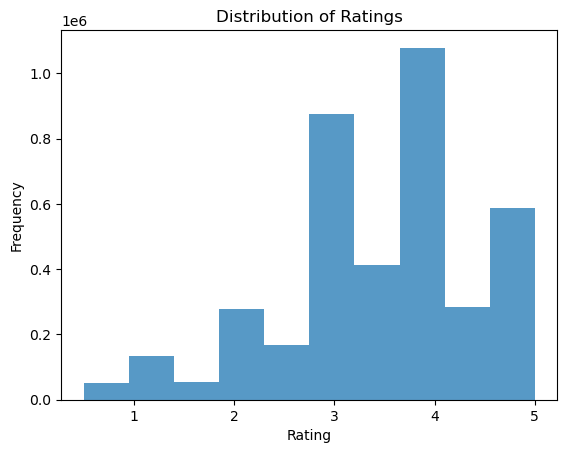

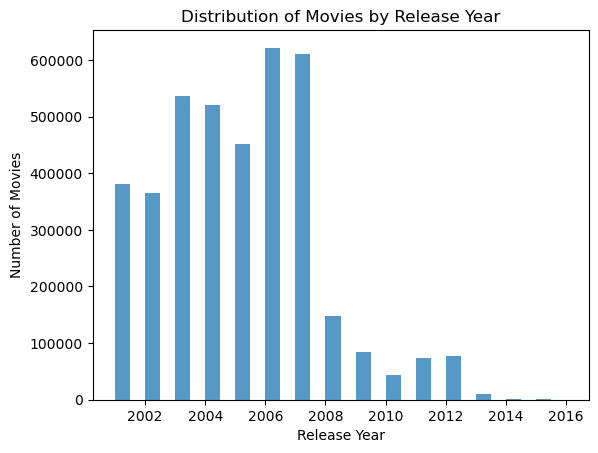

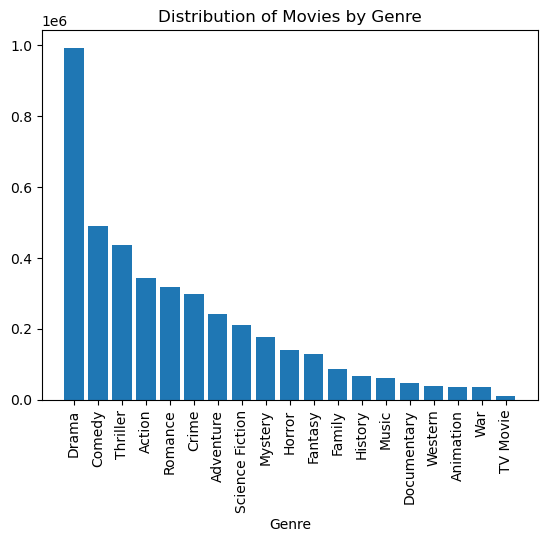

In [44]:
# Distribution of ratings
import matplotlib.pyplot as plt

plt.hist(filtered_genres_ratings['rating'], bins=10, alpha=0.75)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Distribution of movies across release years
plt.hist(filtered_genres_ratings['release_year'], bins=30, alpha=0.75)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year')
plt.show()

# Distribution of genres (assuming genre columns exist)
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
                 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
                 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

genre_counts = filtered_genres_ratings[genre_columns].sum().sort_values(ascending=False)

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.title('Distribution of Movies by Genre')
plt.show()

Correlation between Rating and Release Year:
                rating  release_year
rating        1.000000      0.039367
release_year  0.039367      1.000000


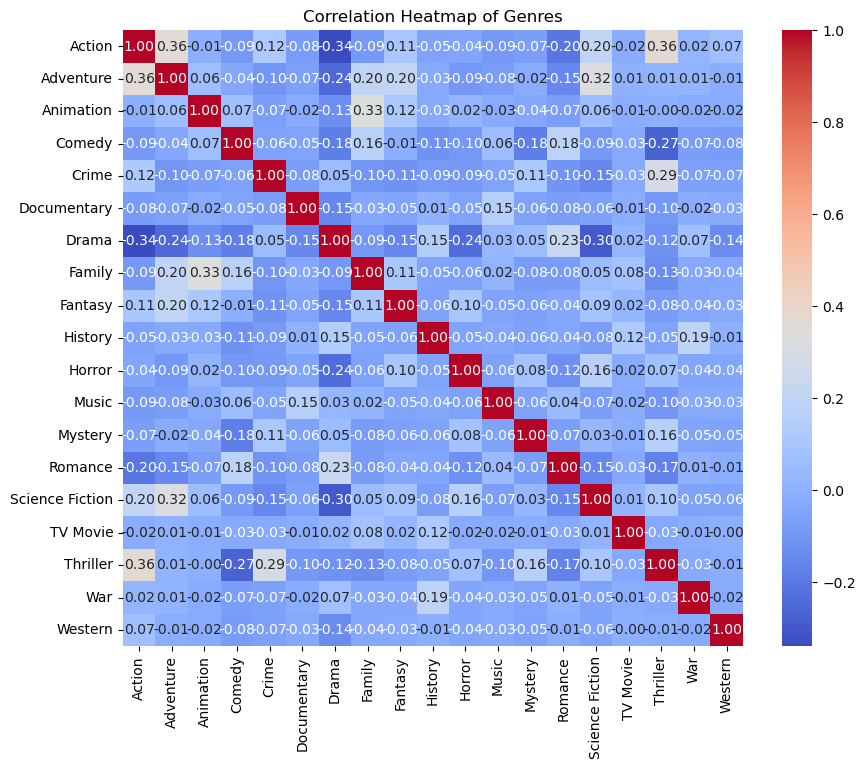

In [45]:
# Correlation between rating and release year
corr = filtered_genres_ratings[['rating', 'release_year']].corr()
print('Correlation between Rating and Release Year:')
print(corr)

# Correlation heatmap between genres
genre_corr = filtered_genres_ratings[genre_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Genres')
plt.show()



# Modeling and Analysis

# Recommendation System (Example: Nearest Neighbors)

# Working on release year and rating

In [46]:

#checking null values
filtered_genres_ratings.isnull().sum()

rating                   0
release_year             0
Action             2201340
Adventure          2201340
Animation          2201340
Comedy             2201340
Crime              2201340
Documentary        2201340
Drama              2201340
Family             2201340
Fantasy            2201340
Foreign            2201340
History            2201340
Horror             2201340
Music              2201340
Mystery            2201340
Romance            2201340
Science Fiction    2201340
TV Movie           2201340
Thriller           2201340
War                2201340
Western            2201340
dtype: int64

In [47]:
filtered_genres_ratings.shape

(3923794, 22)

In [48]:
filtered_genres_ratings.dropna(inplace=True)

/var/folders/5q/7b5rgzx91vl9f65fc911y_900000gn/T/ipykernel_802/3545902056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres_ratings.dropna(inplace=True)


In [49]:
#checking null values
filtered_genres_ratings.isnull().sum()

rating             0
release_year       0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

In [50]:
filtered_genres_ratings.shape

(1722454, 22)

In [51]:
filtered_genres_ratings.head()

,rating,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4,5.0,2006,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,4.0,2007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,4.0,2012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,5.0,2012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,3.0,2005,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
filtered_genres_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722454 entries, 4 to 11430456
Data columns (total 22 columns):
 #   Column           Dtype  
---  ------           -----  
 0   rating           float64
 1   release_year     int64  
 2   Action           float64
 3   Adventure        float64
 4   Animation        float64
 5   Comedy           float64
 6   Crime            float64
 7   Documentary      float64
 8   Drama            float64
 9   Family           float64
 10  Fantasy          float64
 11  Foreign          float64
 12  History          float64
 13  Horror           float64
 14  Music            float64
 15  Mystery          float64
 16  Romance          float64
 17  Science Fiction  float64
 18  TV Movie         float64
 19  Thriller         float64
 20  War              float64
 21  Western          float64
dtypes: float64(21), int64(1)
memory usage: 302.2 MB


In [53]:
# filtered_genres_ratings has movie features (release_year, genres)
X_train = filtered_genres_ratings.drop(["rating"], axis=1)  # Remove rating from features
                                                            

# Impute missing values (adjust strategy as needed)
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train_filled = imputer.transform(X_train)

# Create additional features (optional)
# ... (e.g., combine genres, TF-IDF)

# Initialize and fit nearest neighbors model (experiment with k and metric)
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)  # Adjust k
model.fit(X_train_filled)

# Example of using the model for recommendation
sample_movie = [[2000, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]  # Ensure complete genre data
distances, indices = model.kneighbors(sample_movie)

# Filter out sample movie (optional)
filtered_indices = indices[0][1:]

# Get recommended movies and potentially use additional information for ranking
recommended_movies = filtered_genres_ratings.iloc[filtered_indices]
print('Recommended movies based on nearest neighbors:')

# ... (consider using ratings, release year, etc. for ranking)
print(recommended_movies)

Recommended movies based on nearest neighbors:
          rating  release_year  Action  Adventure  Animation  Comedy  Crime  \
1839212      3.0          2003     1.0        0.0        1.0     0.0    0.0   
5241769      2.5          2003     1.0        0.0        1.0     0.0    0.0   
2050860      3.0          2006     1.0        0.0        1.0     0.0    0.0   
6805896      4.5          2006     1.0        0.0        1.0     0.0    0.0   
389819       3.5          2013     1.0        0.0        1.0     0.0    0.0   
1017482      4.0          2013     1.0        0.0        1.0     0.0    0.0   
10907044     5.0          2012     1.0        0.0        1.0     0.0    0.0   
7037691      5.0          2012     1.0        1.0        1.0     0.0    0.0   
7841690      4.5          2012     1.0        0.0        1.0     0.0    0.0   

          Documentary  Drama  Family  ...  History  Horror  Music  Mystery  \
1839212           0.0    0.0     0.0  ...      0.0     0.0    0.0      0.0   
524176

In [ ]:
recommended_movies

In [ ]:
import seaborn as sns

#  filtered_genres_ratings has rating, release_year, Drama, Action, Romance columns
ratings = filtered_genres_ratings["rating"]
release_year = filtered_genres_ratings["release_year"]
drama = filtered_genres_ratings["Drama"]
action = filtered_genres_ratings["Action"]
romance = filtered_genres_ratings["Romance"]

# Create subplots with color representing rating
g = sns.FacetGrid(filtered_genres_ratings, col="Drama", hue="rating", col_wrap=2)
g.map(plt.scatter, "release_year", "Action")
g.map(plt.scatter, "release_year", "Romance")
g.fig.suptitle("Rating by Release Year for Drama, Action, Romance")
g.add_legend()
plt.show()


In [59]:

# filtered_genres_ratings has movie features (release_year, genres, rating)
X_train = filtered_genres_ratings.drop(["rating"], axis=1)  # Remove rating from features

# Impute missing values (adjust strategy as needed)
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train_filled = imputer.transform(X_train)

# Initialize and fit nearest neighbors model (experiment with k and metric)
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
model.fit(X_train_filled)

# Example of using the model for recommendation
sample_movie = [[2000, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]  # Ensure complete genre data
distances, indices = model.kneighbors(sample_movie)

# Filter out sample movie (optional)
filtered_indices = indices[0][1:]

# Get recommended movies and their actual ratings
recommended_movies = filtered_genres_ratings.iloc[filtered_indices]
actual_ratings = recommended_movies['rating'].values

# Example of predicting ratings using average rating
predicted_ratings = np.full(len(actual_ratings), recommended_movies['rating'].mean())

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print('RMSE:', rmse)
print('MAE:', mae)
print(recommended_movies)


RMSE: 0.8748897637790901
MAE: 0.7901234567901234
          rating  release_year  Action  Adventure  Animation  Comedy  Crime  \
1839212      3.0          2003     1.0        0.0        1.0     0.0    0.0   
5241769      2.5          2003     1.0        0.0        1.0     0.0    0.0   
2050860      3.0          2006     1.0        0.0        1.0     0.0    0.0   
6805896      4.5          2006     1.0        0.0        1.0     0.0    0.0   
389819       3.5          2013     1.0        0.0        1.0     0.0    0.0   
1017482      4.0          2013     1.0        0.0        1.0     0.0    0.0   
10907044     5.0          2012     1.0        0.0        1.0     0.0    0.0   
7037691      5.0          2012     1.0        1.0        1.0     0.0    0.0   
7841690      4.5          2012     1.0        0.0        1.0     0.0    0.0   

          Documentary  Drama  Family  ...  History  Horror  Music  Mystery  \
1839212           0.0    0.0     0.0  ...      0.0     0.0    0.0      0.0   
5241

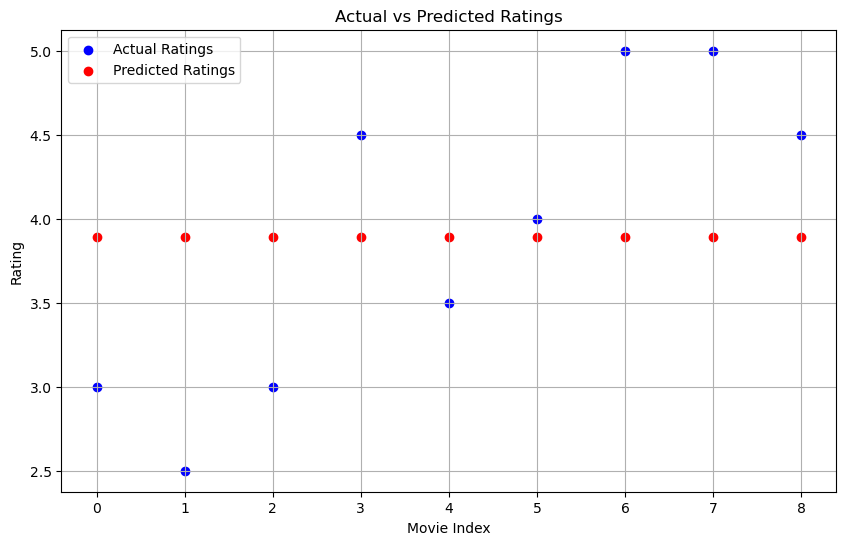

In [64]:
import matplotlib.pyplot as plt

# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))

plt.scatter(range(len(actual_ratings)), actual_ratings, color='blue', label='Actual Ratings')
plt.scatter(range(len(predicted_ratings)), predicted_ratings, color='red', label='Predicted Ratings')

plt.title('Actual vs Predicted Ratings')
plt.xlabel('Movie Index')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()
